### **Nombre:** Andrés Felipe Riaño Quintanilla.
### **Cédula:** 1083928808.

# **Tarea 08**

### **Librerías:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import warnings
from itertools import combinations
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")
%config Application.log_level = 'ERROR'

### **Funciones:**

In [2]:
def classifier(df_train, names, X):
    '''
    Dado un conjunto de datos (dataset) que incluye cuatro columnas de características 
    y una columna denominada Target, compuesta por valores enteros que van desde 0 hasta 
    un valor máximo n, además de una lista que contiene los nombres asociados a cada 
    categoría en Target, y un arreglo unidimensional de numpy con cuatro valores que 
    corresponden a las características de un objeto en el mismo orden que las columnas 
    del dataset, clasifica el objeto en una de las categorías de Target y asigna el 
    nombre correspondiente según la lista proporcionada.

    Parameters
    ----------
    df_train : pandas.DataFrame
        Un DataFrame con el dataset, que contiene cuatro columnas de características
        y una columna de etiqueta llamada 'Target' con valores enteros desde 0 hasta
        un valor máximo de categorías.
    names : list of str
        Una lista de nombres asociados a cada categoría posible en la columna 'Target'.
        La longitud de la lista debe coincidir con el número de categorías en 'Target'.
    X : numpy.ndarray
        Un arreglo unidimensional de numpy con 4 entradas, correspondientes a las 
        características del objeto a clasificar. Las entradas deben estar en el mismo 
        orden que las columnas de características del dataset.
    
    Returns
    -------
    Class : list
        Lista con dos elementos. El primer elemento es un `str` que representa la
        categoría en la que se clasificó al objeto cuyas características vienen dadas
        por X, y el segundo es un `float` que representa la probabilidad con la que 
        se realizó tal clasificación.
    '''

    x = X.reshape(1,-1)    
    n = df_train['Target'].nunique()

    y_train = [(df_train['Target'] == i).astype(float) for i in range(n)]
    x_train = df_train.iloc[:,0:4].values

    Dict = {}

    for i in range(n):

        log_reg = LogisticRegression()
        log_reg.fit(x_train,y_train[i])
        Dict[names[i]] = log_reg.predict_proba(x)

    for i in list(Dict.keys()):

        if Dict[i][0][1] > 0.5:

            Class = [i,Dict[i][0][1]]
            break

    return Class

In [3]:
def classifier2(df_train, names, X, reg = 'l2'):
    '''
    Dado un conjunto de datos (dataset) que incluye cuatro columnas de características 
    y una columna denominada Target, compuesta por valores enteros que van desde 0 hasta 
    un valor máximo n, además de una lista que contiene los nombres asociados a cada 
    categoría en Target, y un arreglo unidimensional de numpy con cuatro valores que 
    corresponden a las características de un objeto en el mismo orden que las columnas 
    del dataset, clasifica el objeto en una de las categorías de Target y asigna el 
    nombre correspondiente según la lista proporcionada. 

    Parameters
    ----------
    df_train : pandas.DataFrame
        Un DataFrame con el dataset, que contiene cuatro columnas de características
        y una columna de etiqueta llamada 'Target' con valores enteros desde 0 hasta
        un valor máximo de categorías.
    names : list of str
        Una lista de nombres asociados a cada categoría posible en la columna 'Target'.
        La longitud de la lista debe coincidir con el número de categorías en 'Target'.
    X : numpy.ndarray
        Un arreglo unidimensional de numpy con 4 entradas, correspondientes a las 
        características del objeto a clasificar. Las entradas deben estar en el mismo 
        orden que las columnas de características del dataset.
    reg : str or NoneType
        Cadena de texto con el valor 'l2' o un objeto None. Este parámetro determina 
        si la clasificación se realiza con regularización L2 ('l2') o sin regularización 
        (None). El valor predeterminado es 'l2'. Cualquier otro valor distinto de 'l2' o 
        None generará un error.
        
    Returns
    -------
    Class : list
        Lista con dos elementos. El primer elemento es un `str` que representa la
        categoría en la que se clasificó al objeto cuyas características vienen dadas
        por X, y el segundo es un `float` que representa la probabilidad con la que 
        se realizó tal clasificación.
    '''

    x = X.reshape(1,-1) 

    y_train = df_train['Target'] 
    X_train = df_train.iloc[:,0:4].values

    softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10, random_state = 42, penalty = reg)
    softmax_reg.fit(X_train, y_train)

    probs= softmax_reg.predict_proba(x)

    for i,j in enumerate(probs[0]):

        if j > 0.5:

            Class = [names[i],j]
            break
        
    return Class

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera un gráfico simple de la curva de aprendizaje para los conjuntos de prueba y entrenamiento.

    Parameters
    ----------
    estimator : ObjectType 
        Un objeto que implementa los métodos "fit" y "predict". Se clona para cada validación.
    title : string
        Título para el gráfico.
    X : numpy.ndarray o similar
        Vector de entrenamiento de dimensión n*m, donde n es el número de muestras y m es el
        número de características.
    y : numpy.ndarray o similar
        Objetivo asociado a X para clasificación o regresión; None para aprendizaje no 
        supervisado. Su dimensión es n*m y es opcional.
    ylim : tuple
        Define los valores mínimos y máximos del eje y en el gráfico. La primera entrada es
        el mínimo y la segunda entrada el máximo. Opcional.
    cv : integer
        Generador de validación cruzada. Si se pasa un entero, indica el número de pliegues 
        (por defecto es 3). Se pueden pasar objetos específicos de validación cruzada; 
        consulte el módulo sklearn.cross_validation para ver la lista de objetos posibles. 
        Opcional.
    n_jobs : integer
        Número de procesos a ejecutar en paralelo (por defecto es 1). Opcional

    Returns
    -------
    plt : module
        El módulo `matplotlib.pyplot` para realizar configuraciones adicionales sobre el 
        gráfico.
    """
    plt.figure()
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

### **Ejercicio 8.1**

Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```python
from sklearn import datasets
iris = datasets.load_iris()
```
<div style="text-align: justify;">

Realizar la clasifición de las tres clases  a través de una regresión logística  y realizar multiclasicación. Para ello considere considere que si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente:

</div>

Sea A, B, C las tres clases. Para estos valores:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1.
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$.
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1.
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$.
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1.
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$.


In [5]:
iris = datasets.load_iris()
iris.keys()   #Columnas del dataset.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris.DESCR)   #Información del dataset.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
iris.target_names   #Tipos de flor que hay en el dataset.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X = iris["data"]
Y = iris["target"]
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols= [col.replace(")" ,"") for col in columns_name ] 
df.columns=cols
df["Target"]=Y
df.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

df_train = strat_train_set   #Datos de entrenamiento.
df_test = strat_test_set   #Datos de prueba.
names = list(iris.target_names)   #Lista con los nombres de cada tipo de flor.

**Clasificación tipo 1: setosa**

In [10]:
y_train_setosa = (df_train['Target'] == 0).astype(float)
X_train_setosa = df_train.iloc[:,0:4].values

y_test_setosa = (df_test['Target'] == 0).astype(float) 
X_test_setosa = df_test.iloc[:,0:4].values

log_reg_setosa = LogisticRegression()
log_reg_setosa.fit(X_train_setosa, y_train_setosa)

print('Score datos de entrenamiento: {}'.format(log_reg_setosa.score(X_train_setosa,y_train_setosa)))
print('Score datos de prueba: {}'.format(log_reg_setosa.score(X_test_setosa,y_test_setosa)))

Score datos de entrenamiento: 1.0
Score datos de prueba: 1.0


**Clasificación tipo 2: versicolor**

In [11]:
y_train_versicolor = (df_train['Target'] == 1).astype(float)
X_train_versicolor = df_train.iloc[:,0:4].values

y_test_versicolor = (df_test['Target'] == 1).astype(float) 
X_test_versicolor = df_test.iloc[:,0:4].values

log_reg_versicolor = LogisticRegression()
log_reg_versicolor.fit(X_train_versicolor, y_train_versicolor)

print('Score datos de entrenamiento: {}'.format(log_reg_versicolor.score(X_train_versicolor,y_train_versicolor)))
print('Score datos de prueba: {}'.format(log_reg_versicolor.score(X_test_versicolor,y_test_versicolor)))

Score datos de entrenamiento: 0.725
Score datos de prueba: 0.7


**Clasificación tipo 3: virginica**

In [12]:
y_train_virginica = (df_train['Target'] == 2).astype(float)
X_train_virginica = df_train.iloc[:,0:4].values

y_test_virginica = (df_test['Target'] == 2).astype(float) 
X_test_virginica = df_test.iloc[:,0:4].values

log_reg_virginica = LogisticRegression()
log_reg_virginica.fit(X_train_virginica, y_train_virginica)

print('Score datos de entrenamiento: {}'.format(log_reg_virginica.score(X_train_virginica,y_train_virginica)))
print('Score datos de prueba: {}'.format(log_reg_virginica.score(X_test_virginica,y_test_virginica)))

Score datos de entrenamiento: 0.975
Score datos de prueba: 0.9666666666666667


**Prueba con $x = [4.9,5.0, 1.8, 0.3]$**

A continuación se determinará la probabilidad de que la flor sea setosa, versicolor o virginica.

In [13]:
x = np.array([4.9,5.0,1.8,0.3]).reshape(1,-1)
Dict = {'setosa':log_reg_setosa.predict_proba(x),'versicolor':log_reg_versicolor.predict_proba(x),'virginica':log_reg_virginica.predict_proba(x)}

for i in list(Dict.keys()):
    print('Probabilidad de que la flor sea una {}: {}'.format(i,Dict[i][0][1]))

Probabilidad de que la flor sea una setosa: 0.9864365959832107
Probabilidad de que la flor sea una versicolor: 0.007752749403927674
Probabilidad de que la flor sea una virginica: 7.260106801151703e-06


<div style="text-align: justify;">
El proceso descrito se encuentra completamente automatizado en la función `classifier`, definida al inicio del notebook. Esta función permite obtener de manera directa la clasificación correspondiente, dado un conjunto de características ingresadas, junto con la probabilidad asociada.
</div>

In [14]:
classification = classifier(df_train,names,np.array([4.9,5.0,1.8,0.3]))
print('La flor en cuestión es una {} con una probabilidad de {}'.format(classification[0],classification[1]))

La flor en cuestión es una setosa con una probabilidad de 0.9864365959832107


### **Ejercicio 8.2**

<div style="text-align: justify;">

La elección anterior se conoce como regresión softmax, la cual permite definir un conjunto de probabilidades asociadas a diferentes clases. Al identificar el valor máximo de probabilidad para un conjunto de entradas, se determina la clase que predice el modelo. A continuación, se presenta una forma de implementar este enfoque de manera rápida.

</div>

In [15]:
y_train = df_train['Target'] 
X_train = df_train.iloc[:,0:4].values

y_test = df_test['Target'] 
X_test = df_test.iloc[:,0:4].values

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [16]:
print('Score datos de entrenamiento: {}'.format(softmax_reg.score(X_train,y_train)))
print('Score datos de prueba: {}'.format(softmax_reg.score(X_test,y_test)))

Score datos de entrenamiento: 0.975
Score datos de prueba: 1.0


Usando el algoritmo anterior se puede ver que la probabilidad de que la flor sea setosa, versicolor o virginica es:

In [17]:
for i,j in enumerate(list(Dict.keys())):
    print('Probabilidad de que la flor sea una {}: {}'.format(j,softmax_reg.predict_proba(x)[0][i]))

Probabilidad de que la flor sea una setosa: 0.9993426165707305
Probabilidad de que la flor sea una versicolor: 0.0006573834292652199
Probabilidad de que la flor sea una virginica: 4.270305887738741e-15


Mediante la función `classifier2`, definida en la sección de funciones al inicio del notebook, es posible clasificar la flor:

In [18]:
A = classifier2(df_train,names,np.array([4.9,5.0,1.8,0.3]))

In [19]:
print('La planta es una {} con una probabilidad de {}.'.format(A[0],A[1]))

La planta es una setosa con una probabilidad de 0.9993426165707305.


**Regularización**

<div style="text-align: justify;">

En regresión logística la regularización es una técnica que se emplea para evitar overfitting en modelos de *Machine Learning*. La manera en la que lo hace es añadiendo una penalización a la función de coste que el modelo intenta minimizar. Hay varios tipos de regularización, como lo son L1 y L2. La regularización L1 calcula la suma de los valores absolutos de los parámetros del modelo, mientras que la regularización L2 se obtiene con la raiz cuadrada de la suma de los cuadrados de los parámetros. Ahora bien, en este caso en particular, el solucionador `'lbfgs'` de `LogisticRegression` solamente soporta regularización L2 o directamente el modelo sin regularizar. Como `LogisticRegression` tiene activada por defecto la regularización `'l2'`, a continuación se analizará el resultado de emplear el modelo sin regularizar.

</div>

**Modelo sin regularización**

In [20]:
softmax_reg_no = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, penalty=None)
softmax_reg_no.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', penalty=None,
                   random_state=42)

In [21]:
print('Score datos de entrenamiento: {}'.format(softmax_reg_no.score(X_train,y_train)))
print('Score datos de prueba: {}'.format(softmax_reg_no.score(X_test,y_test)))

Score datos de entrenamiento: 0.9833333333333333
Score datos de prueba: 1.0


In [22]:
for i,j in enumerate(list(Dict.keys())):
    print('Probabilidad de que la flor sea una {}: {}'.format(j,softmax_reg_no.predict_proba(x)[0][i]))

Probabilidad de que la flor sea una setosa: 1.0
Probabilidad de que la flor sea una versicolor: 9.144208389845218e-31
Probabilidad de que la flor sea una virginica: 4.840133330499552e-57


Aplicando la función `classifier2`, pero desactivando la regularización:

In [23]:
B = classifier2(df_train,names,np.array([4.9,5.0,1.8,0.3]),reg=None)

In [24]:
print('La planta es una {} con una probabilidad de {}.'.format(B[0],B[1]))

La planta es una setosa con una probabilidad de 1.0.


Comparando el score del modelo que usa la regularización con el modelo desregularizado, se puede ver que en este ejemplo en particular el caso desregularizado se ajusta mejor.

**Métricas y curvas de aprendizaje**

<div style="text-align: justify;">

El *cross-validation score* es una métrica que evalúa el rendimiento de un modelo mediante la segmentación del conjunto de datos en varios subconjuntos o "folds". Esta técnica es esencial para comprobar la capacidad de generalización de un modelo en datos nuevos y reducir el riesgo de *overfitting*. A continuación, se generarán dos curvas de aprendizaje: una para el modelo regularizado y otra para el modelo sin regularización, teniendo en cuenta el *cross-validation score* en cada caso.

</div>

/home/andres/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<module 'matplotlib.pylab' from '/home/andres/.local/lib/python3.10/site-packages/matplotlib/pylab.py'>

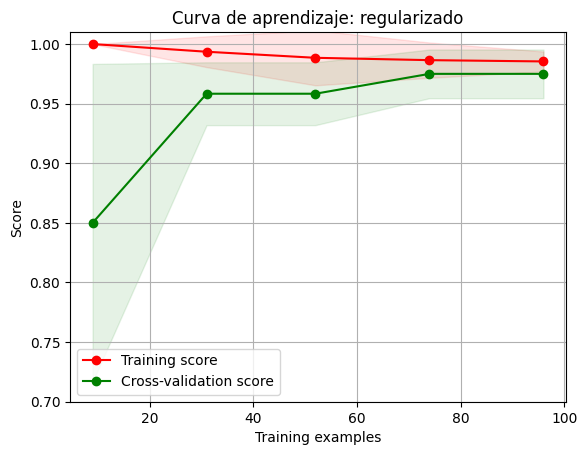

In [25]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
titulo = "Curva de aprendizaje: regularizado"
estimador = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
plot_learning_curve(estimador, titulo, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<div style="text-align: justify;">

En general, la curva del training score es más alta que la curva del *cross-validation score*. Con pocos datos de entrenamiento, la brecha entre ambas curvas es amplia y la curva del *training score* se acerca mucho a 1; además, la banda de incertidumbre en la curva del *cross-validation score* es ancha, mientras que en la del *training score* es estrecha. Esto sugiere que, con pocos datos de entrenamiento, el modelo muestra signos de *overfitting*. A medida que aumenta el número de datos de entrenamiento, el modelo mejora su generalización y la brecha entre ambas curvas disminuye.

</div>

<module 'matplotlib.pylab' from '/home/andres/.local/lib/python3.10/site-packages/matplotlib/pylab.py'>

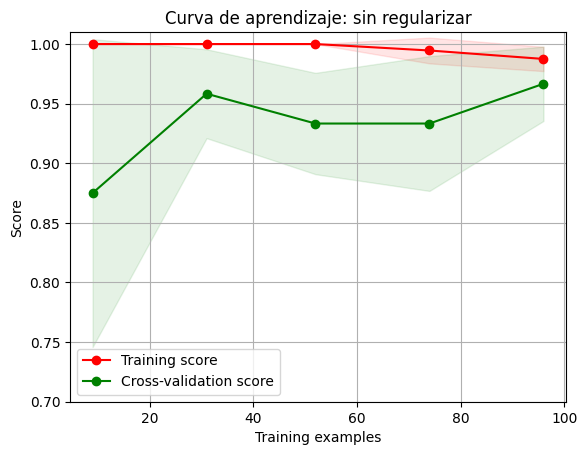

In [26]:
titulo2 = "Curva de aprendizaje: sin regularizar"
estimador = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42,penalty=None)

plot_learning_curve(estimador, titulo2, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<div style="text-align: justify;">

Al igual que en el caso anterior, la curva del *training score* se mantiene siempre por encima de la curva del *cross-validation score*. Con pocos datos de entrenamiento, la brecha entre ambas curvas es muy amplia: el *training score* es cercano a 1, mientras que la banda de incertidumbre del *cross-validation score* es considerablemente ancha y la del *training score* es prácticamente inexistente. Esto sugiere que el modelo presenta *overfitting* con pocos datos de entrenamiento. 

A medida que se incrementan los datos de entrenamiento, la curva del *cross-validation score* tiende a acercarse a la del *training score*, mientras que esta última se aleja ligeramente de 1. Sin embargo, la banda de incertidumbre del *cross-validation score* sigue siendo mucho más ancha en comparación con la del *training score*, lo que indica que el modelo sin regularización exhibe más *overfitting* que el modelo regularizado.

</div>

**Fronteras de decisión**

<div style="text-align: justify;">
A continuación se presentará un gráfico con las fronteras de decisión para cada par de características del dataset.
</div>

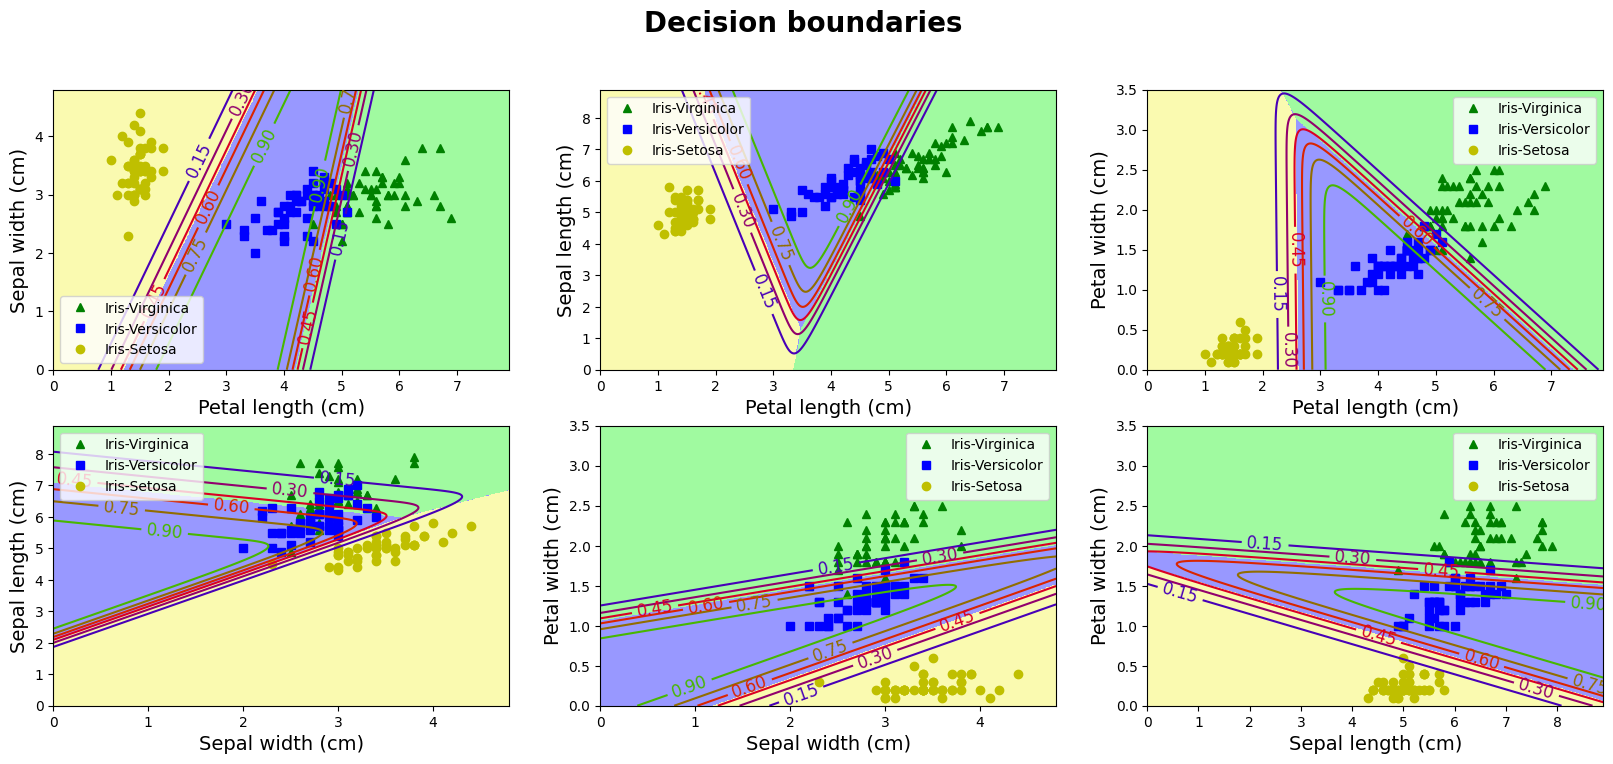

In [27]:
Lista0 = [i[0:5]+' '+i[5:].replace('_',' ').lower().replace('cm','(cm)') for i in df.keys().to_list()[0:4]]
Lista1 = list(combinations(set([(i,j) for (i,j) in enumerate(Lista0)]), 2))
Lista2 = [Lista1[:3], Lista1[3:]]
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

fig.suptitle("Decision boundaries", fontweight='bold', fontsize=20)

for i in range(len(Lista2)):
    for j in range(len(Lista2[i])):

        X = iris["data"][:, (Lista2[i][j][0][0],Lista2[i][j][1][0])]  
        y = iris["target"]

        softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
        softmax_reg.fit(X, y)

        x0, x1 = np.meshgrid(
                np.linspace(0, X[y==2, 0].max()+1, 500).reshape(-1, 1),
                np.linspace(0, X[y==2, 1].max()+1, 500).reshape(-1, 1),
            )
        X_new = np.c_[x0.ravel(), x1.ravel()]

        y_proba = softmax_reg.predict_proba(X_new)
        y_predict = softmax_reg.predict(X_new)

        zz1 = y_proba[:, 1].reshape(x0.shape)
        zz = y_predict.reshape(x0.shape)

        axs[i,j].plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
        axs[i,j].plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
        axs[i,j].plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
        axs[i,j].contourf(x0, x1, zz, cmap=custom_cmap)
        contour = axs[i,j].contour(x0, x1, zz1, cmap=plt.cm.brg)
        axs[i,j].clabel(contour, inline=1, fontsize=12)
        axs[i,j].set_xlabel(Lista2[i][j][0][1],fontsize=14)
        axs[i,j].set_ylabel(Lista2[i][j][1][1],fontsize=14)
        axs[i,j].legend()